# 개발주제 : 길이에 따른 
#### 학습자료 (독립변수) sepal.length","sepal.width","petal.length"
##### 정답 (종속변수) "petal.width"

In [56]:
# [1-1] 모듈 로딩 - 데이터 분석용

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

In [57]:
file = '../Data/iris.csv'
iris_df = pd.read_csv(file)

In [58]:
iris_df.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [59]:
iris_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# 길이 와 넓이 시각화

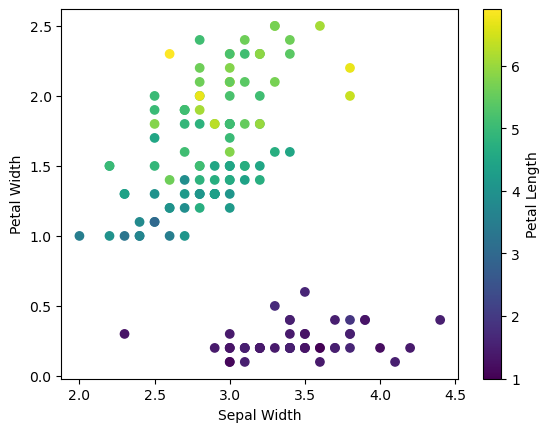

In [63]:
plt.scatter(iris_df['sepal.width'], iris_df['petal.width'], c=iris_df['petal.length'], cmap='viridis')
plt.xlabel('Sepal Width')
plt.ylabel('Petal Width')
plt.colorbar(label='Petal Length')  # 색상 바 추가
plt.show()


In [64]:
# 데이터셋 준비 => 학습용, 검증용, 테스트용 
# 학습용 => length 
# 타겟 => width

# 독립변수
featureDF = iris_df[['sepal.length', 'sepal.width', 'petal.length']]
# 종속변수
targetSR = iris_df['petal.width']

print(f'featureDF => {featureDF.ndim}D targetSR => {targetSR.ndim}D')


featureDF => 2D targetSR => 1D


In [65]:
# 학습용 : 테스트용 => 80:20
X_train, X_test, y_train, y_test = train_test_split(featureDF,targetSR,test_size=0.2, random_state=10)


print(f'X_train => {X_train.shape},  X_test => {X_test.shape}')
print(f'y_train => {y_train.shape},  y_test => {y_test.shape}')


X_train => (120, 3),  X_test => (30, 3)
y_train => (120,),  y_test => (30,)


In [66]:
# 학습용 : 검증용 => 80:20
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train,\
													test_size=0.2,\
													random_state=10)


print(f'X_train => {X_train.shape}, X_val => {X_val.shape} ,X_test => {X_test.shape}')
print(f'y_train => {y_train.shape}, y_val => {y_val.shape}, y_test => {y_test.shape}')

X_train => (96, 3), X_val => (24, 3) ,X_test => (30, 3)
y_train => (96,), y_val => (24,), y_test => (30,)


In [67]:
# [3-2] 학습 진행 => 알고리즘 객체 생성
iris_Model = LinearRegression()

In [68]:
# [3-3] 학습진행 => 학승용 데이터셋 사용
iris_Model.fit(X_train,y_train)

LinearRegression()

In [69]:
# => 모델 파라미터 확인
print(f'iris_Model.coef_ {iris_Model.coef_},iris_Model.intercept_ {iris_Model.intercept_}')

iris_Model.coef_ [-0.21285693  0.22825744  0.52746591],iris_Model.intercept_ -0.22337544072754034


# [4] 학습평가

In [73]:
# [4-1] 성능 평가 : 모델 적합도 => 검증용 데이터 셋
score = iris_Model.score(X_val,y_val)

print(f'모델 성능 평가 {score}')

모델 성능 평가 0.9521298175014177


In [71]:
# [4-2] 손실계산 : 검증용 데이터셋으로 예측값 추출 ==> 손실계산
pre_y = iris_Model.predict(X_val)


mse = mean_squared_error(y_val, pre_y)
mae = mean_absolute_error(y_val, pre_y)

print(f'mean_squared_error : {mse}, mean_absolute_error : {mae}')

mean_squared_error : 0.02895813609341324, mean_absolute_error : 0.13576116162332685


In [ ]:
x = input('"sepal.length","sepal.width","petal.length" 값을 ,로 구분해서 입력해주세요: ')

# 입력값을 숫자로 변환
user_input_list = list(map(float, x.split(','))) 
user_input_array = np.array(user_input_list).reshape(1, -1)  

# 예측 수행
predicted_score = iris_Model.predict(user_input_array)  

# 결과 출력
print(f"{x}의 예상 너비(petal.width)는 {predicted_score[0]:.4f}입니다.")

10,20,30의 예상 너비(petal.width)는 18.0372입니다.


c:\Users\KDT17\anaconda3\envs\ML_PY39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
